In [66]:
# import require package to play with pytorch ^_^ Let's start 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
torch.__version__

'2.2.1+cpu'

In [68]:
arr = np.array([1,2,3,4,5])

In [69]:
arr

array([   1,    2,    3,    4,    5])

In [70]:
arr.dtype

dtype('int32')

In [71]:
type(arr)

numpy.ndarray

In [72]:
# indicate tensor in pytorch method 1
torch.from_numpy(arr)

tensor([1, 2, 3, 4, 5], dtype=torch.int32)

In [73]:
# indicate tensor in pytorch method 2
x = torch.as_tensor(arr)

In [74]:
x.dtype

torch.int32

In [75]:
arr2d = np.arange(0.0,12.0)

In [76]:
arr2d

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [77]:
arr2d = arr2d.reshape(3,4)

In [78]:
arr2d

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [79]:
x2 = torch.as_tensor(arr2d)

In [80]:
x2

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [81]:
arr[0] = 121212

In [82]:
# the data from tensor was change as array
x

tensor([121212,      2,      3,      4,      5], dtype=torch.int32)

In [83]:
my_tensor = torch.tensor(arr2d)

In [84]:
my_tensor

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [85]:
arr2d[0][0] = 0

In [86]:
arr2d

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [87]:
# the torch.tensor() was not changed when the array was change due to torch.tensor() make a copy from array
my_tensor

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [88]:
arr.dtype

dtype('int32')

In [89]:
torch.tensor(arr)

tensor([121212,      2,      3,      4,      5], dtype=torch.int32)

In [90]:
my_float_tensor = torch.Tensor(arr)

In [91]:
my_float_tensor

tensor([1.2121e+05, 2.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00])

In [92]:
# different  of torch.tensor() or torch.Tensor() just in data type int32 vs float32
my_float_tensor.dtype

torch.float32

In [93]:
torch.empty(2,2)

tensor([[inf, 0.],
        [0., 0.]])

In [94]:
torch.zeros(3,4,dtype=torch.float64)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)

In [95]:
torch.ones(2,10)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [96]:
torch.arange(1,20,2).reshape(5,2)

tensor([[ 1,  3],
        [ 5,  7],
        [ 9, 11],
        [13, 15],
        [17, 19]])

In [97]:
torch.linspace(0,20,12).reshape(3,4)

tensor([[ 0.0000,  1.8182,  3.6364,  5.4545],
        [ 7.2727,  9.0909, 10.9091, 12.7273],
        [14.5455, 16.3636, 18.1818, 20.0000]])

In [98]:
my_tensor.dtype

torch.float64

In [99]:
my_tensor = my_tensor.type(torch.int32)

In [100]:
# I change the data type of my tensor by torch.int32
my_tensor.dtype

torch.int32

In [101]:
my_tensor_original = torch.zeros(3,5)

In [102]:
my_tensor_original

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [103]:
my_tensor_original.size()

torch.Size([3, 5])

In [104]:
torch.randint_like(my_tensor_original,low=10,high=100)

tensor([[60., 38., 33., 71., 53.],
        [11., 64., 35., 15., 10.],
        [45., 91., 80., 43., 68.]])

In [105]:
# this generator once generate new number and after that repeat it due to torch.manual_seed()
torch.manual_seed(85)
torch.randn_like(my_tensor_original)

tensor([[-0.8931, -0.1447,  0.9534, -2.6251,  0.5982],
        [ 0.7360, -0.7027,  0.4127, -0.5930, -0.8437],
        [ 0.6537,  0.1320, -1.5606, -0.7590,  0.9112]])

In [106]:
# define transforms.ToTensor() in transform variable for own convinience 
transform = transforms.ToTensor()

In [107]:
# download dataset from pytorch and save to data folder
train_data = datasets.MNIST(root='/Data/MNIST_From_Download_Pytorchvision/train',train=True,download=True,transform=transform)

In [108]:
test_data = datasets.MNIST(root='/Data/MNIST_From_Download_Pytorchvision/test',train=False,download=True,transform=transform)

In [109]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Data/MNIST_From_Download_Pytorchvision/train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [110]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Data/MNIST_From_Download_Pytorchvision/test
    Split: Test
    StandardTransform
Transform: ToTensor()

In [111]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [112]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [113]:
# define image and label variable from train_data
image,label = train_data[0]

In [114]:
label

5

In [115]:
# 1 is channel of color of my image --> grayscale 
image.shape

torch.Size([1, 28, 28])

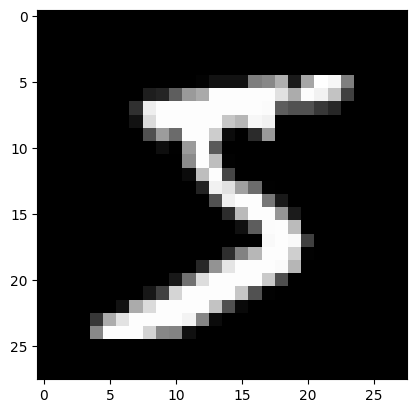

In [116]:
plt.imshow(image.reshape((28,28)),cmap="gray")

In [117]:
torch.manual_seed(85)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)
test_loader = DataLoader(train_data,batch_size=500,shuffle=False)

In [118]:
# formatting the data from show images
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [119]:
# load first batch into images and labels 
for images,labels in train_loader:
    break

In [120]:
# the 100 size of first batch is filled into images Tensor
images.shape

torch.Size([100, 1, 28, 28])

In [121]:
labels.shape

torch.Size([100])

Labels:  [   3    0    1    0    5    7    3    8    2    0    6    0]


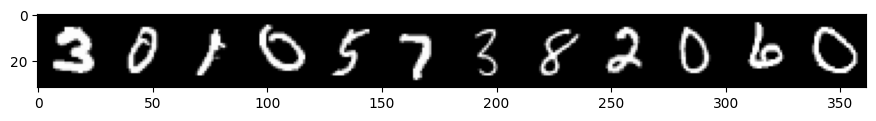

In [122]:
# show first batch until 12 with their labels
im = make_grid(images[:12],nrow=12)
plt.figure(figsize=(10.7,1))
plt.imshow(np.transpose(im.numpy(),(1,2,0)));
print("Labels: ",labels[:12].numpy())

In [123]:
# define ANN model with 2 fully connected layers
class MultilayerPerceptron(nn.Module):
    def __init__(self,input_size=784,output_size=10,layers=[120,84]):
        super().__init__()

        self.fc1 = nn.Linear(input_size,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],output_size)
        
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X,dim=1)    
    

In [124]:
torch.manual_seed(85)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [125]:
# different of ANN vs CNN parameters --> ANN parameters is  105,214
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [126]:
# define loss and optimizer and learning rate 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [127]:
# we must convert image shape to [100,784] or like flatten
images.shape

torch.Size([100, 1, 28, 28])

In [128]:
images.view(100,-1).shape

torch.Size([100, 784])

In [138]:
# start define tarin structure 
import time

# record time to what time to train model required 
start_time = time.time()

epochs = 20

# trackers of model training 
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    train_crt = 0
    test_crt = 0

    for b , (x_train,y_train) in enumerate(train_loader):
        
        b+=1 
        y_pred = model(x_train.view(100,-1))
        loss = criterion(y_pred,y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_crt = (predicted == y_train).sum()
        train_crt += batch_crt

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            acc = train_crt.item()*100/(100*b)
            print(f"Epoch= {i+1} Batch= {b} Loss= {loss.item():1.3f} Accuracy= {acc} %")

    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train_crt)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Totally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_crt += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_crt)
    
total_time = time.time() - start_time 
print(f"Duration Training Model: {total_time/60} mins")

Epoch= 1 Batch= 200 Loss= 0.203 Accuracy= 97.955 %
Epoch= 1 Batch= 400 Loss= 0.097 Accuracy= 97.9175 %
Epoch= 1 Batch= 600 Loss= 0.086 Accuracy= 97.865 %
Epoch= 2 Batch= 200 Loss= 0.072 Accuracy= 98.21 %
Epoch= 2 Batch= 400 Loss= 0.180 Accuracy= 98.2175 %
Epoch= 2 Batch= 600 Loss= 0.110 Accuracy= 98.19 %
Epoch= 3 Batch= 200 Loss= 0.102 Accuracy= 98.71 %
Epoch= 3 Batch= 400 Loss= 0.049 Accuracy= 98.625 %
Epoch= 3 Batch= 600 Loss= 0.084 Accuracy= 98.54166666666667 %
Epoch= 4 Batch= 200 Loss= 0.006 Accuracy= 98.925 %
Epoch= 4 Batch= 400 Loss= 0.034 Accuracy= 98.8375 %
Epoch= 4 Batch= 600 Loss= 0.037 Accuracy= 98.73833333333333 %
Epoch= 5 Batch= 200 Loss= 0.016 Accuracy= 99.05 %
Epoch= 5 Batch= 400 Loss= 0.020 Accuracy= 99.015 %
Epoch= 5 Batch= 600 Loss= 0.020 Accuracy= 98.995 %
Epoch= 6 Batch= 200 Loss= 0.058 Accuracy= 99.29 %
Epoch= 6 Batch= 400 Loss= 0.012 Accuracy= 99.175 %
Epoch= 6 Batch= 600 Loss= 0.060 Accuracy= 99.15 %
Epoch= 7 Batch= 200 Loss= 0.042 Accuracy= 99.47 %
Epoch= 7 Batc

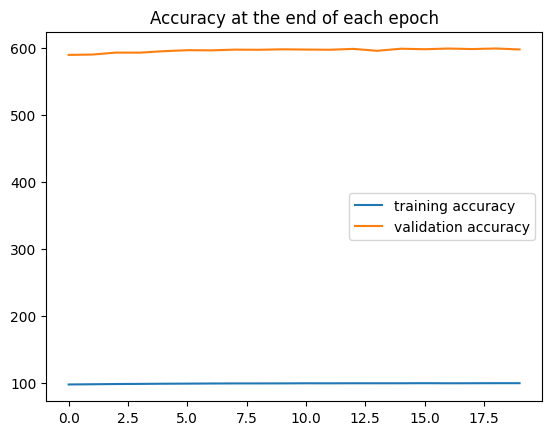

In [141]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [142]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(58961), tensor(59015), tensor(59309), tensor(59300), tensor(59519), tensor(59667), tensor(59643), tensor(59750), tensor(59728), tensor(59797), tensor(59761), tensor(59734), tensor(59863), tensor(59573), tensor(59888), tensor(59810), tensor(59916), tensor(59833), tensor(59922), tensor(59776)]

Test accuracy: 597.760%


In [143]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [144]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9765/10000 =  97.650%


In [145]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 968    0    2    1    0    2    2    0    4    1]
 [   0 1130    6    1    2    0    3   11    0    4]
 [   1    3  994    3    1    0    0    5    3    0]
 [   0    0    1  979    0    7    0    1    1    3]
 [   2    0    4    0  966    1   16    2    3    8]
 [   1    0    0    9    1  865   10    0    2    4]
 [   2    0    2    0    3    4  925    0    0    0]
 [   1    0    6    3    0    1    0  998    2    1]
 [   3    2   16    7    0    7    2    2  954    2]
 [   2    0    1    7    9    5    0    9    5  986]]


In [146]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

235

In [147]:
# Display the first 10 index positions
misses[:10]

array([ 124,  149,  151,  158,  217,  247,  274,  321,  340,  445],
      dtype=int64)

In [148]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Index: [ 124  149  151  158  217  247  274  321  340  445  447  449]
Label: [   7    2    9    3    6    4    9    2    5    6    4    3]
Guess: [   4    9    8    2    5    2    3    7    3    0    9    5]


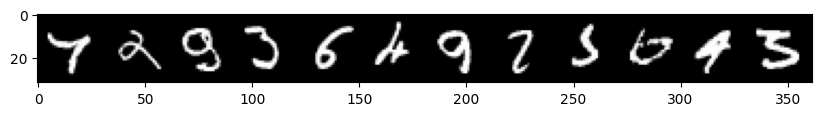

In [149]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));